In [1]:
# it is used for image segmentation

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load():
    global img
    original = cv2.imread("data/pennies.jpg", 0)
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    img = original.copy()

In [36]:
def imshow(img):
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap = 'gray')

In [5]:
load()

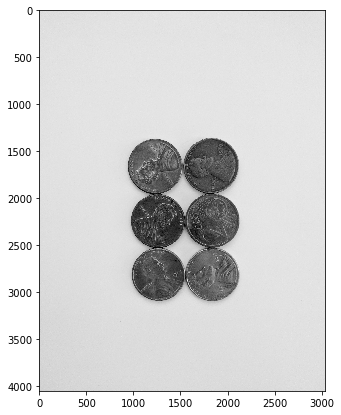

In [6]:
imshow(img)

In [7]:
# 1. apply median blur - remove the unnessary details from the coins like face
# 2. Get image in grayscale
# 3. binary thresholding
# 4. find contours

In [8]:
blurred = cv2.medianBlur(img, 25)

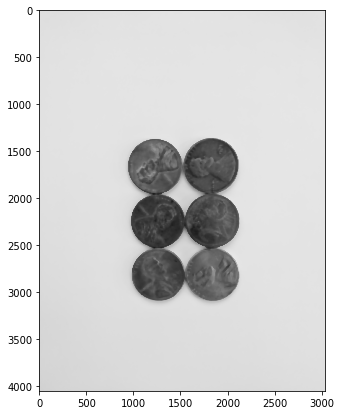

In [9]:
imshow(blurred)

In [10]:
blurred = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY)

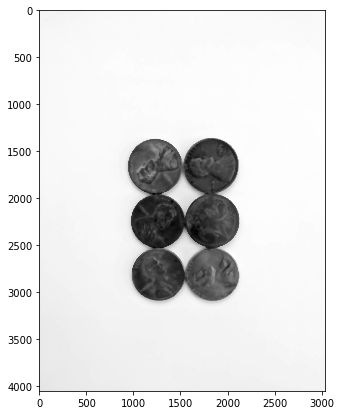

In [11]:
imshow(blurred)

In [12]:
np.median(blurred)

225.0

In [13]:
ret, thresholdimg = cv2.threshold(blurred, 160, 230, cv2.THRESH_BINARY_INV)

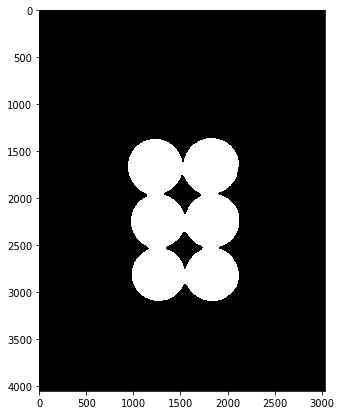

In [14]:
imshow(thresholdimg)

In [15]:
# find contours

In [16]:
contours, heirarchy = cv2.findContours(thresholdimg, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [17]:
heirarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [-1,  1, -1,  0]]], dtype=int32)

In [18]:
newimg = np.zeros(blurred.shape)
for i in range(len(contours)):
    if heirarchy[0][i][3] == -1:
        cv2.drawContours(newimg, contours, i, 255, 10)
        cv2.drawContours(img, contours, i, (255, 0, 0), 20)

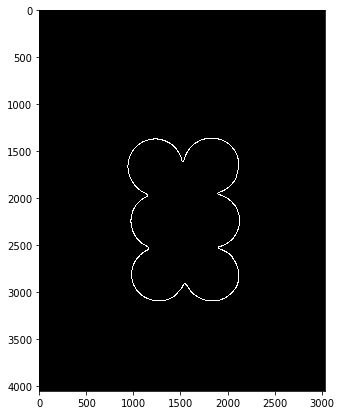

In [19]:
imshow(newimg)

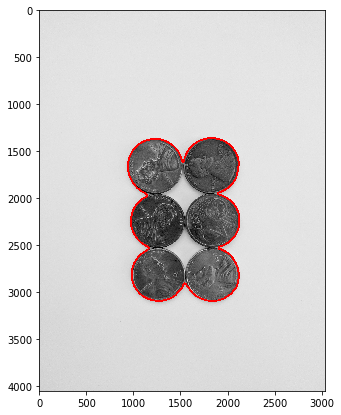

In [20]:
imshow(img)

In [21]:
# general contor detection is not doing great here so apply watershed algorithm

# watershed Algorithm

In [22]:
#  otsu thresholding works better in conjuction with watershed algorithm

In [23]:
load()

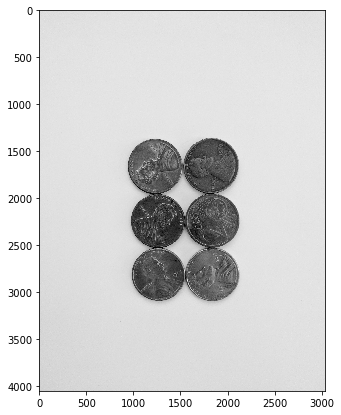

In [24]:
imshow(img)

In [25]:
blurred = cv2.medianBlur(img, 35)

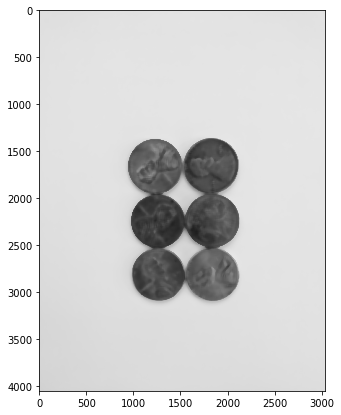

In [26]:
imshow(blurred)

In [27]:
blurred = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY)

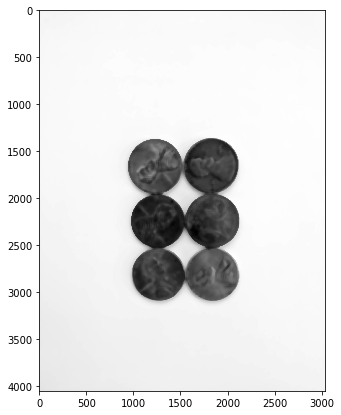

In [28]:
imshow(blurred)

In [29]:
# otsu thresholding
# put thresh = minvalue which is 0
# and maxval = maxvalue which is 255
ret, thresholdimg = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

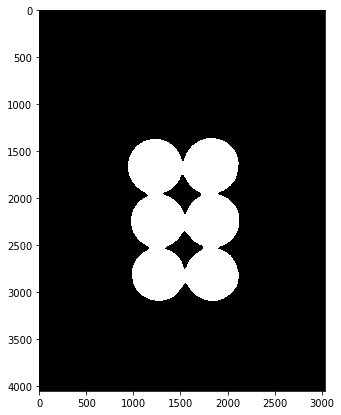

In [30]:
imshow(thresholdimg)

In [31]:
# NOISE REMOVAL

In [32]:
kernel = np.ones((3,3), np.uint8)

kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [33]:
opening = cv2.morphologyEx(thresholdimg, cv2.MORPH_OPEN, kernel, iterations=2) # this will not make effect on this image but it
#                                                                                 will show effect on complex images

In [34]:
# distance transform so that only center will be bright and edges will be dark
# src is single channeled  imaage
dist_transform = cv2.distanceTransform(src=opening, distanceType=cv2.DIST_L2, maskSize=5)

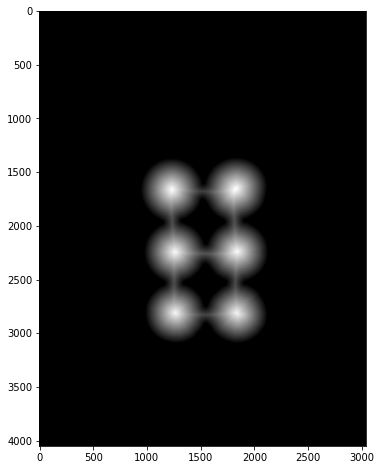

In [37]:
imshow(dist_transform)

In [49]:
ret, sure_foreground  = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, cv2.THRESH_BINARY)

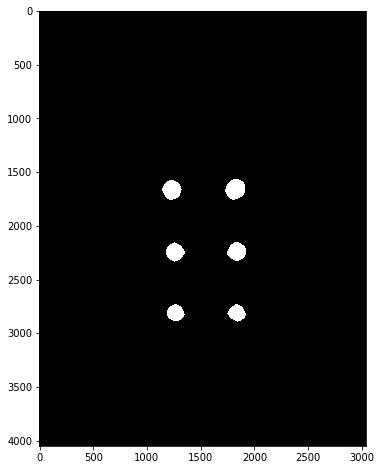

In [51]:
imshow(sure_foreground)

In [52]:
# finding the sure background, as if we subtract sure foreground we will get unknown region
sure_background = cv2.dilate(opening, kernel, iterations=3)

In [54]:
sure_foreground = np.uint8(sure_foreground)

In [55]:
unknown_region = np.subtract(sure_background, sure_foreground)

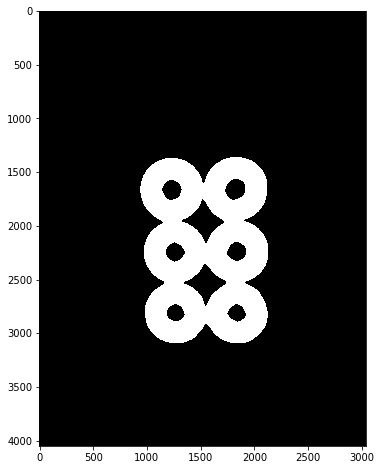

In [56]:
imshow(unknown_region)

In [101]:
# creating the label markers for the watershed algorithm
ret, markers = cv2.connectedComponents(sure_foreground)

In [102]:
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

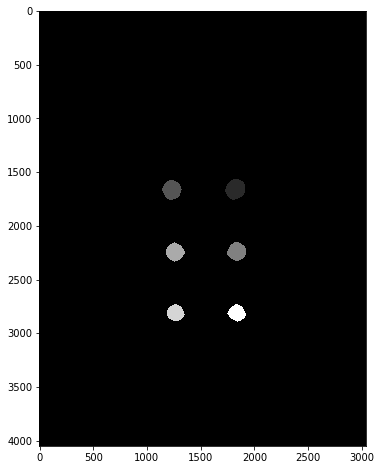

In [103]:
imshow(markers)

In [104]:
# we did this as the unknown region black should not get confused with the marker black
markers = markers+1

In [105]:
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [106]:
markers[unknown_region==255] = 0

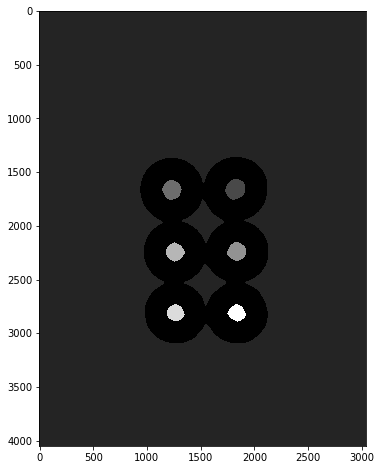

In [107]:
imshow(markers)

In [108]:
# markers are the seeds

In [112]:
# running watershed algorithm
# img is master image that we have imported
segmented = cv2.watershed(img, markers)

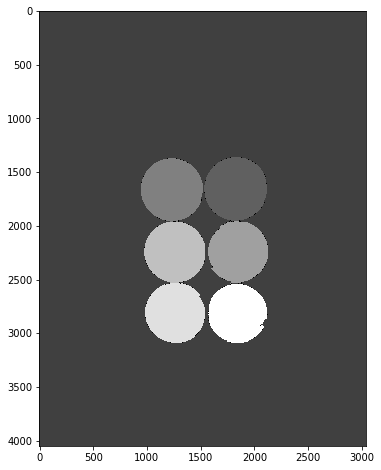

In [113]:
imshow(segmented)

In [114]:
# it have detected the 6 differnt segments in the image

In [115]:
# finding contours
contours, heirarchy = cv2.findContours(segmented, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [116]:
heirarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [-1,  8, -1, -1]]], dtype=int32)

In [117]:
newimg = np.zeros(segmented.shape)
for i in range(len(contours)):
    if heirarchy[0][i][3] == -1:
        cv2.drawContours(newimg, contours, i, 255, 10)
        cv2.drawContours(img, contours, i, (255, 0, 0), 20)

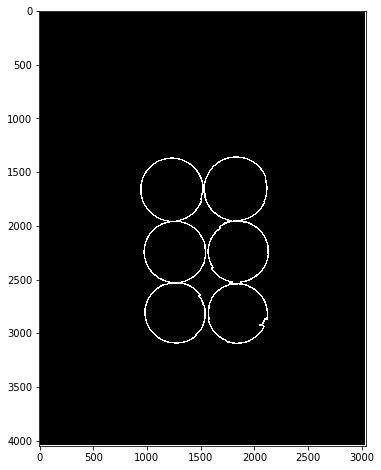

In [118]:
imshow(newimg)

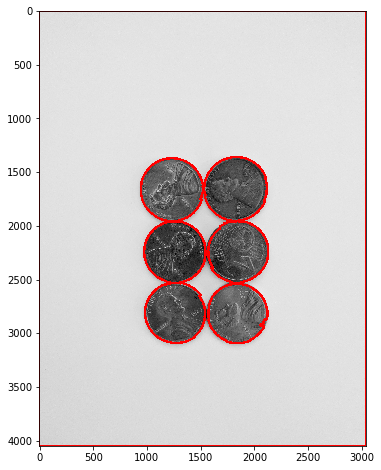

In [119]:
imshow(img)